Problem Statement : The dataset has 100k data points on patients admitted into hospital, indicators of their health condition and how long they were admitted in the hospital. Based on this dataset the hospital wants to predict the length of stay of a patient.

1. Import Libraries

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from time import time
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

2. Understanding the Data

In [2]:
#load the csv file
#store the data in a df
df = pd.read_csv("LengthOfStay.csv")

# display the first five observations
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [3]:
# check the shape of data
df.shape

(100000, 28)

In [4]:
# display the columns in the df, their data types and if it contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

3. Understanding the features


eid	                       - Unique Id of the hospital admission
vdate	                   - Visit date
rcount	                   - Number of readmissions within last 180 days
gender	                   - Gender of the patient - M or F
dialysisrenalendstage	   - Flag for renal disease during encounter
asthma	                   - Flag for asthma during encounter
irondef	                   - Flag for iron deficiency during encounter
pneum	                   - Flag for pneumonia during encounter
substancedependence	       - Flag for substance dependence during encounter
psychologicaldisordermajor - Flag for major psychological disorder during encounter
depress	                   - Flag for depression during encounter
psychother	               - Flag for other psychological disorder during encounter
fibrosisandother	       - Flag for fibrosis during encounter
malnutrition	           - Flag for malnutrituion during encounter
hemo	                   - Flag for blood disorder during encounter
hematocrit	               - Average hematocrit value during encounter (g/dL)
neutrophils	               - Average neutrophils value during encounter (cells/microL)
sodium	                   - Average sodium value during encounter (mmol/L)
glucose	                   - Average sodium value during encounter (mmol/L)
bloodureanitro	           - Average blood urea nitrogen value during encounter (mg/dL)
creatinine	               - Average creatinine value during encounter (mg/dL)
bmi	                       - Average BMI during encounter (kg/m2)
pulse                      - Average pulse during encounter (beats/m)
respiration	               - Average respiration during encounter (breaths/m)
secondarydiagnosisnonicd9  - Flag for whether a non ICD 9 formatted diagnosis was coded as a secondary diagnosis
discharged	               - Date of discharge
facid	                   - Facility ID at which the encounter occurred
lengthofstay	           - Length of stay for the encounter


4. Feature Engineering

In [6]:
# find the data in each column by using value_counts, find if there are any insignificany variables to eliminate
for col in df.columns: 
    display(df[col].value_counts())

eid
1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: count, Length: 100000, dtype: int64

vdate
10/3/2012     333
6/14/2012     324
11/11/2012    324
9/27/2012     317
2/22/2012     315
             ... 
1/11/2012     230
7/6/2012      229
4/11/2012     227
12/1/2012     214
3/20/2012     212
Name: count, Length: 367, dtype: int64

rcount
0     55031
1     15007
2      9987
3      8047
4      6941
5+     4987
Name: count, dtype: int64

gender
F    57643
M    42357
Name: count, dtype: int64

dialysisrenalendstage
0    96358
1     3642
Name: count, dtype: int64

asthma
0    96473
1     3527
Name: count, dtype: int64

irondef
0    90506
1     9494
Name: count, dtype: int64

pneum
0    96055
1     3945
Name: count, dtype: int64

substancedependence
0    93694
1     6306
Name: count, dtype: int64

psychologicaldisordermajor
0    76096
1    23904
Name: count, dtype: int64

depress
0    94834
1     5166
Name: count, dtype: int64

psychother
0    95061
1     4939
Name: count, dtype: int64

fibrosisandother
0    99521
1      479
Name: count, dtype: int64

malnutrition
0    95052
1     4948
Name: count, dtype: int64

hemo
0    92000
1     8000
Name: count, dtype: int64

hematocrit
11.900000    20179
12.000000     4866
11.600000     1550
11.800000     1516
12.100000     1509
             ...  
10.466667        3
6.750000         3
7.866667         3
11.033333        3
12.533333        2
Name: count, Length: 362, dtype: int64

neutrophils
9.400000     19719
9.300000      4248
6.900000       912
7.300000       872
8.100000       871
             ...  
20.833333        2
38.000000        2
10.533333        2
37.900000        2
3.066667         2
Name: count, Length: 656, dtype: int64

sodium
136.210150    2
141.642479    2
136.556976    2
138.311247    2
134.454042    2
             ..
138.991515    1
138.960912    1
136.767861    1
135.010558    1
140.950137    1
Name: count, Length: 99948, dtype: int64

glucose
148.470465    2
129.720211    2
192.476918    1
101.901810    1
127.227144    1
             ..
126.497136    1
134.358082    1
134.633990    1
153.441931    1
149.572205    1
Name: count, Length: 99998, dtype: int64

bloodureanitro
12.000000     45404
9.000000       4120
10.000000      3913
11.000000      3722
13.000000      3469
              ...  
62.500000         3
103.000000        3
41.500000         3
6.142857          3
474.000000        2
Name: count, Length: 261, dtype: int64

creatinine
1.187913    2
0.927038    2
1.211433    2
1.142182    2
0.896881    2
           ..
1.210521    1
1.302881    1
0.993664    1
1.261767    1
0.813004    1
Name: count, Length: 99994, dtype: int64

bmi
27.843315    2
28.844062    2
28.618775    2
30.322514    2
29.184922    2
            ..
29.859199    1
30.567566    1
30.002190    1
31.014736    1
25.175760    1
Name: count, Length: 99994, dtype: int64

pulse
71     3480
73     3384
72     3373
75     3371
74     3366
       ... 
126       1
25        1
23        1
130       1
120       1
Name: count, Length: 100, dtype: int64

respiration
6.500000    64833
6.400000     1524
6.200000     1498
6.600000     1473
6.900000     1449
            ...  
2.800000        3
1.600000        3
5.575000        2
6.166667        2
5.933333        2
Name: count, Length: 160, dtype: int64

secondarydiagnosisnonicd9
1     50029
0     10090
2      9782
3      9020
4      8990
5      3987
6      3086
7      1960
10     1049
8      1006
9      1001
Name: count, dtype: int64

discharged
2/16/2012     316
6/19/2012     315
10/25/2012    315
3/9/2012      313
10/28/2012    312
             ... 
1/9/2013       23
1/10/2013       7
1/12/2013       2
1/11/2013       2
1/13/2013       1
Name: count, Length: 378, dtype: int64

facid
E    30755
A    30035
B    30012
C     4699
D     4499
Name: count, dtype: int64

lengthofstay
1     17979
3     16068
4     14822
2     12825
5     12116
6     10362
7      7263
8      4652
9      2184
10     1000
11      460
12      137
13       75
14       31
15       16
16        6
17        4
Name: count, dtype: int64

In [7]:
# did not find any insignificant variables, but need to eliminate columns like eid, discharged, vdate as they;re not related to length of stay

In [8]:
#Drop the columns which are not required
# Columns to drop
columns_to_drop = ['eid', 'discharged','vdate']

# Drop the columns
df = df.drop(columns=columns_to_drop)

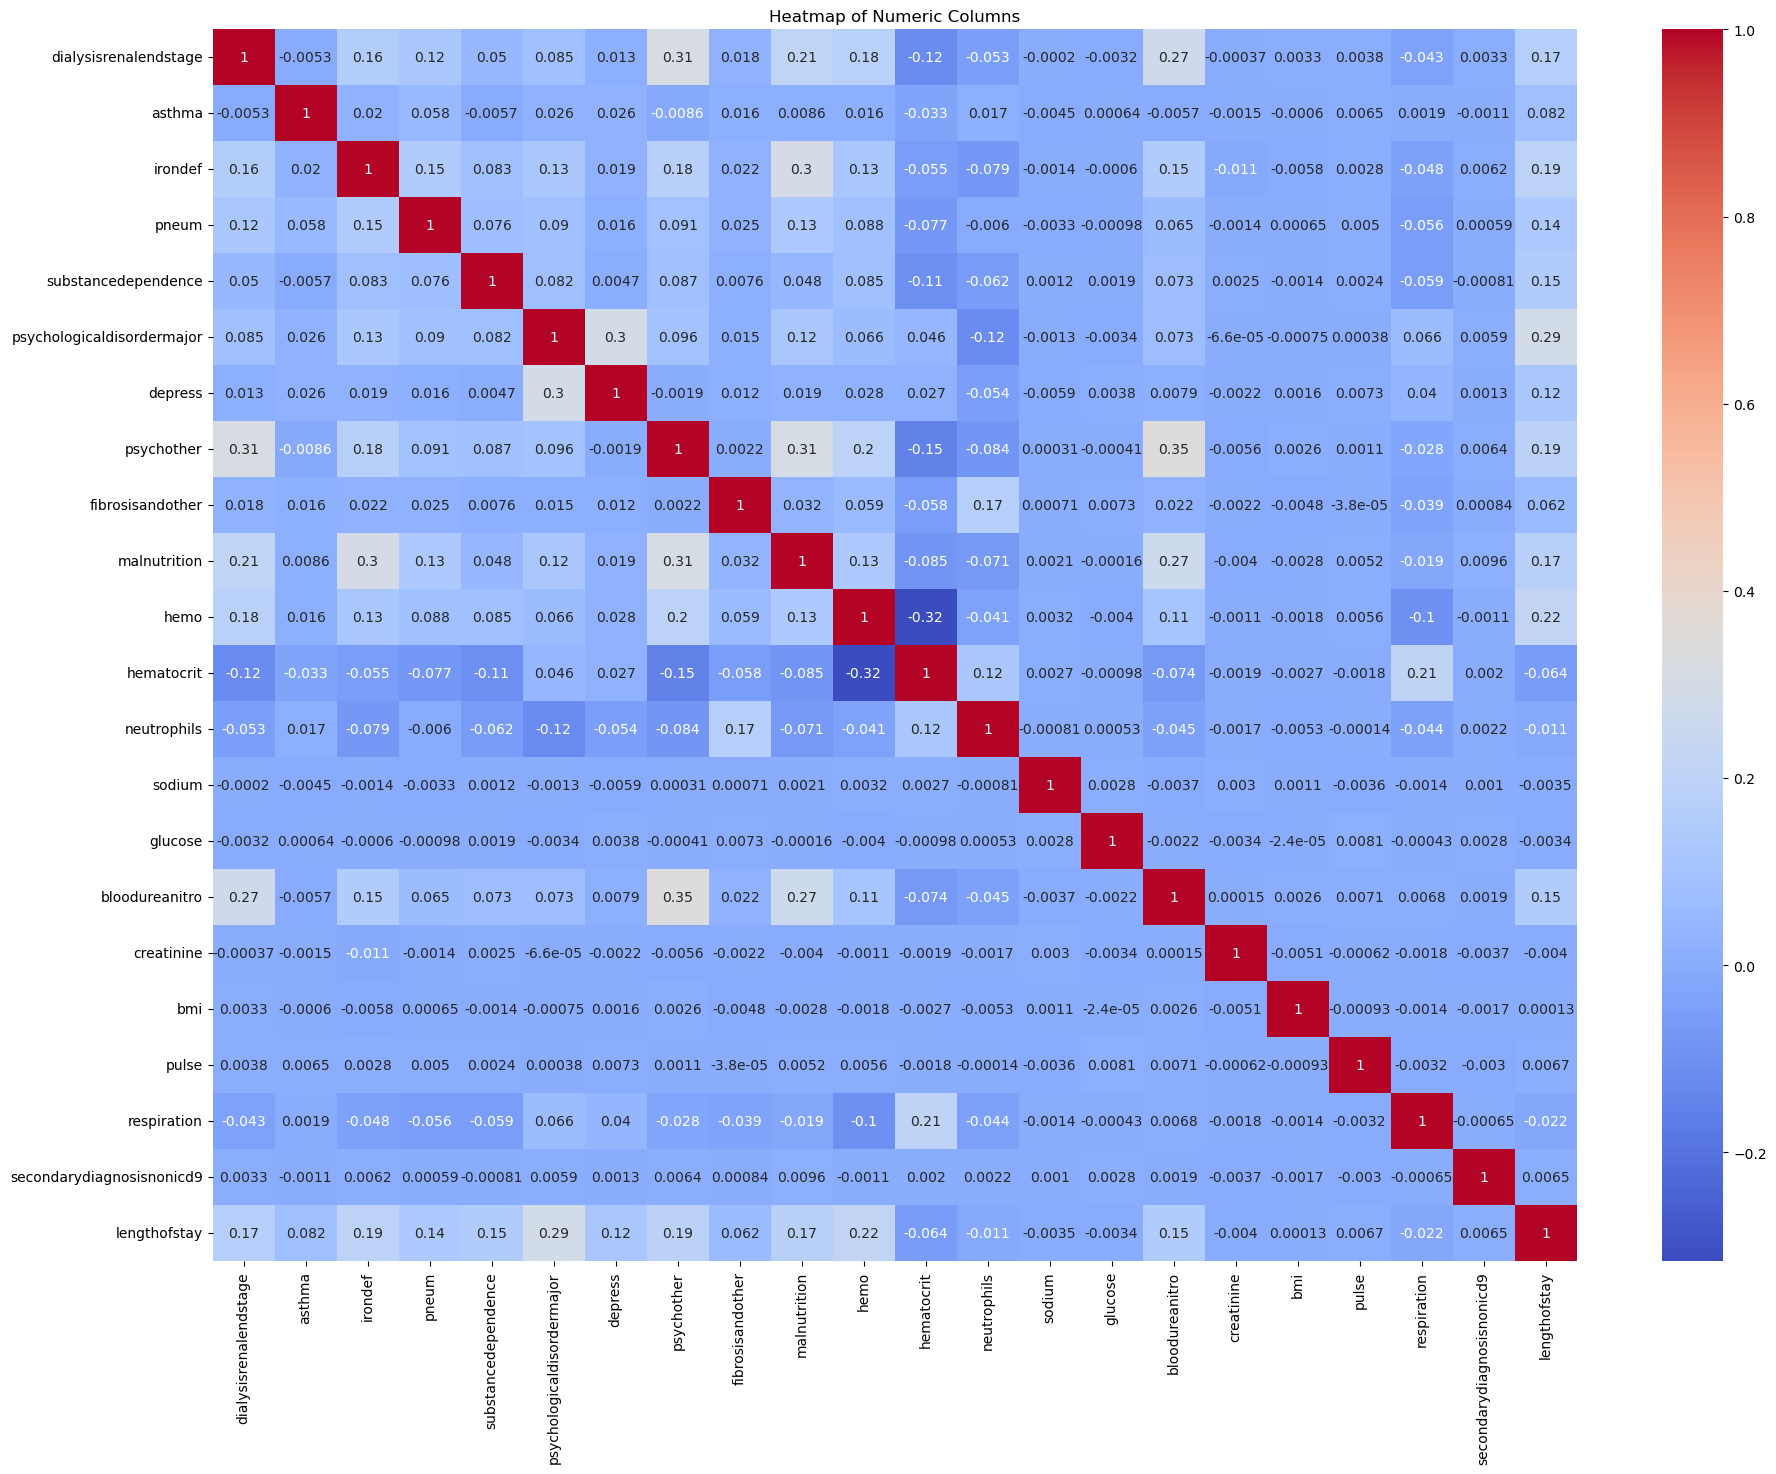

In [9]:
# Find the correlation numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Create a correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(22, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Numeric Columns')
plt.show()

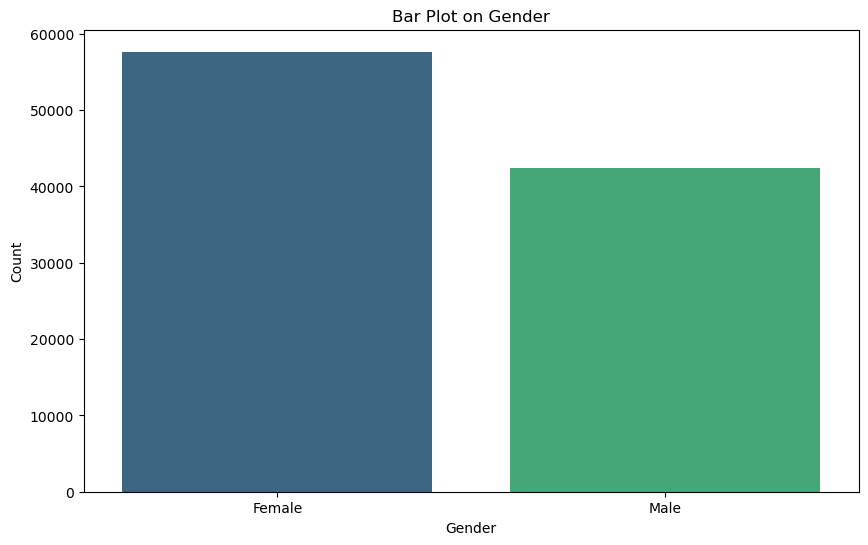

In [10]:
# Bar plot for categorical variable 'gender' by target variable
# Count the occurrences of each category
category_counts = df['gender'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Bar Plot on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

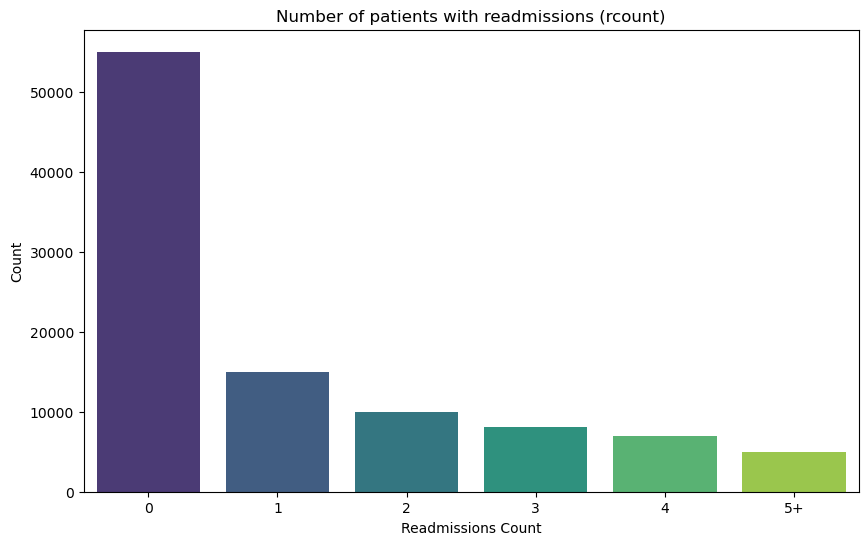

In [11]:
# Bar plot for categorical variable 'rcount' by target variable
# Count the occurrences of each category
category_counts = df['rcount'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Number of patients with readmissions (rcount)')
plt.xlabel('Readmissions Count')
plt.ylabel('Count')
#plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

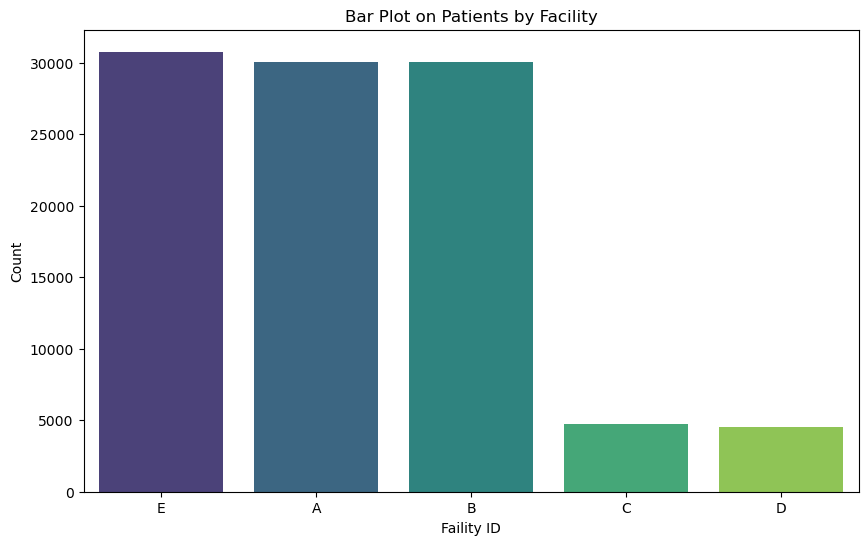

In [12]:
# Bar plot for categorical variable 'facid' by target variable
# Count the occurrences of each category
category_counts = df['facid'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Bar Plot on Patients by Facility')
plt.xlabel('Faility ID')
plt.ylabel('Count')
#plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

In [13]:
# Assuming df is your DataFrame
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['gender', 'rcount', 'facid'])

In [14]:
# Define features and target variable
X = df.drop('lengthofstay', axis=1)
y = df['lengthofstay']

5. Scaling Data and using Principal Component Analysis

In [15]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

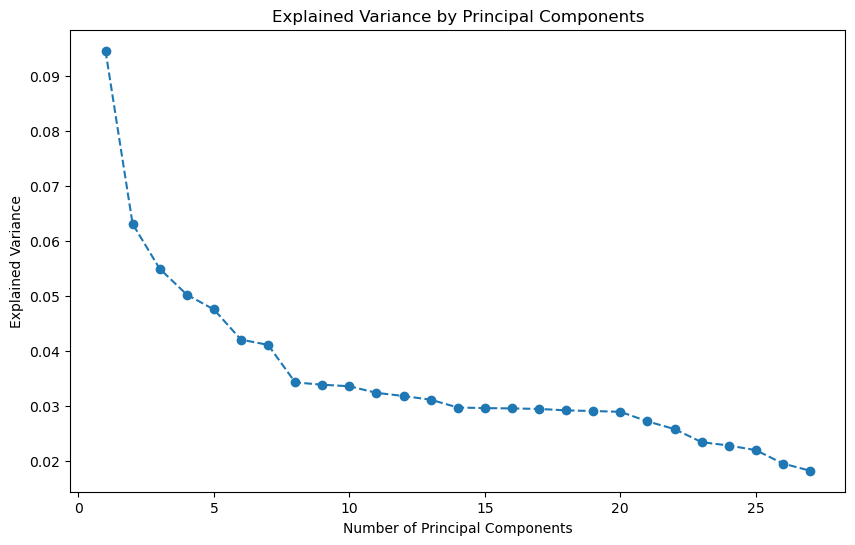

In [16]:
# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [17]:
# Print the shape of the transformed data
print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_pca.shape}")

Original shape: (100000, 34)
Transformed shape: (100000, 27)


6. Train Test Split

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

7. Simple model

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
print("Logistic Regression MSE:", lr_mse)

Logistic Regression MSE: 1.2893158284750812


8. Compare Multiple Models

In [21]:
# Initialize models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dt = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()

In [22]:
# Define parameter grids for Grid Search
param_grid_lr = {'fit_intercept': [True, False]}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
param_grid_dt = {'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10]}
param_grid_gbr = {'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 0.2],'max_depth': [3, 5, 7]}

In [23]:
# Perform Grid Search with cross-validation for each model
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error')

In [24]:
# Fit the models
grid_search_lr.fit(X_train, y_train)
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [25]:
# Predict on the test set
y_pred_lr = grid_search_lr.predict(X_test)
y_pred_ridge = grid_search_ridge.predict(X_test)
y_pred_lasso = grid_search_lasso.predict(X_test)
y_pred_dt = grid_search_dt.predict(X_test)
y_pred_gbr = grid_search_gbr.predict(X_test)

In [26]:
# Calculate mean squared error for all models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Decision Tree Regression MSE: {mse_dt}")
print(f"Gradient Boosting Regression MSE: {mse_gbr}")

print(f"Best parameters for Linear Regression: {grid_search_lr.best_params_}")
print(f"Best parameters for Ridge Regression: {grid_search_ridge.best_params_}")
print(f"Best parameters for Lasso Regression: {grid_search_lasso.best_params_}")
print(f"Best parameters for Decision Tree Regression: {grid_search_dt.best_params_}")
print(f"Best parameters for Gradient Boosting Regression: {grid_search_gbr.best_params_}")

Linear Regression MSE: 1.2893158284750812
Ridge Regression MSE: 1.2893051133978661
Lasso Regression MSE: 1.390587491070394
Decision Tree Regression MSE: 1.0925219698992432
Gradient Boosting Regression MSE: 0.545890207631981
Best parameters for Linear Regression: {'fit_intercept': True}
Best parameters for Ridge Regression: {'alpha': 10.0}
Best parameters for Lasso Regression: {'alpha': 0.1}
Best parameters for Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 10}
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


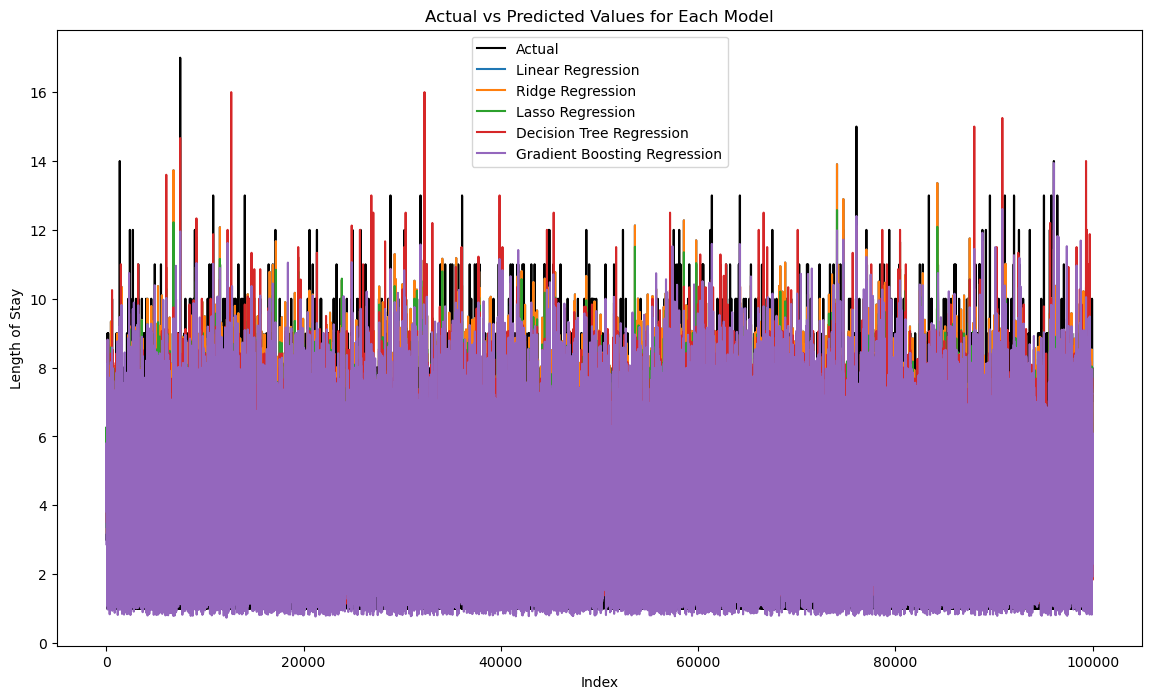

In [31]:
# Create a DataFrame with actual and predicted values
pred_results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'Decision Tree Regression': y_pred_dt,
    'Gradient Boosting Regression': y_pred_gbr
})

# Melt the DataFrame for easier plotting with seaborn
results_melted = pred_results_df.reset_index().melt(id_vars=['index', 'Actual'], var_name='Model', value_name='Prediction')

# Plot the actual vs predicted values for each model
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_melted, x='index', y='Actual', label='Actual', color='black')
sns.lineplot(data=results_melted, x='index', y='Prediction', hue='Model', palette='tab10')
plt.title('Actual vs Predicted Values for Each Model')
plt.xlabel('Index')
plt.ylabel('Length of Stay')
plt.legend()
plt.show()

Showing only few data points for readability

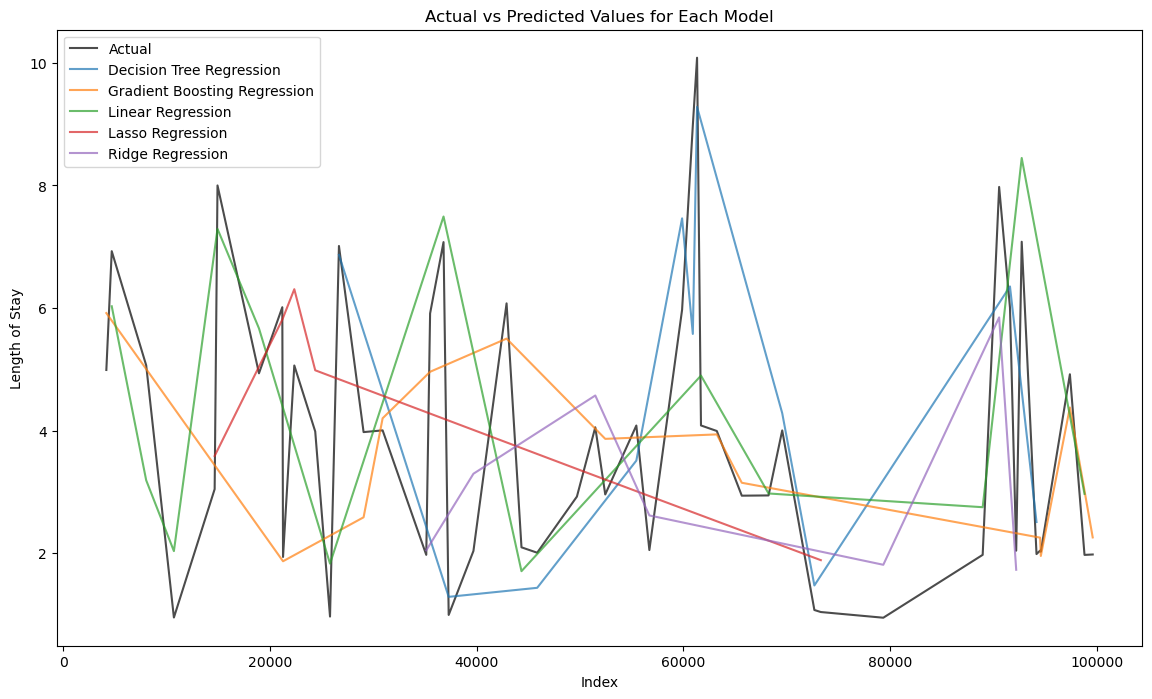

In [34]:
# Subsample the data 
sample_size = 50  
results_melted_sampled = results_melted.sample(n=sample_size, random_state=42) 

# Add jitter to the data 
jitter_width = 0.1  
results_melted_sampled['Actual_jitter'] = results_melted_sampled['Actual'] + np.random.uniform(-jitter_width, jitter_width, size=sample_size)
results_melted_sampled['Prediction_jitter'] = results_melted_sampled['Prediction'] + np.random.uniform(-jitter_width, jitter_width, size=sample_size)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_melted_sampled, x='index', y='Actual_jitter', label='Actual', color='black', alpha=0.7) 
sns.lineplot(data=results_melted_sampled, x='index', y='Prediction_jitter', hue='Model', palette='tab10', alpha=0.7) 
plt.title('Actual vs Predicted Values for Each Model')
plt.xlabel('Index')
plt.ylabel('Length of Stay')
plt.legend()
plt.show()

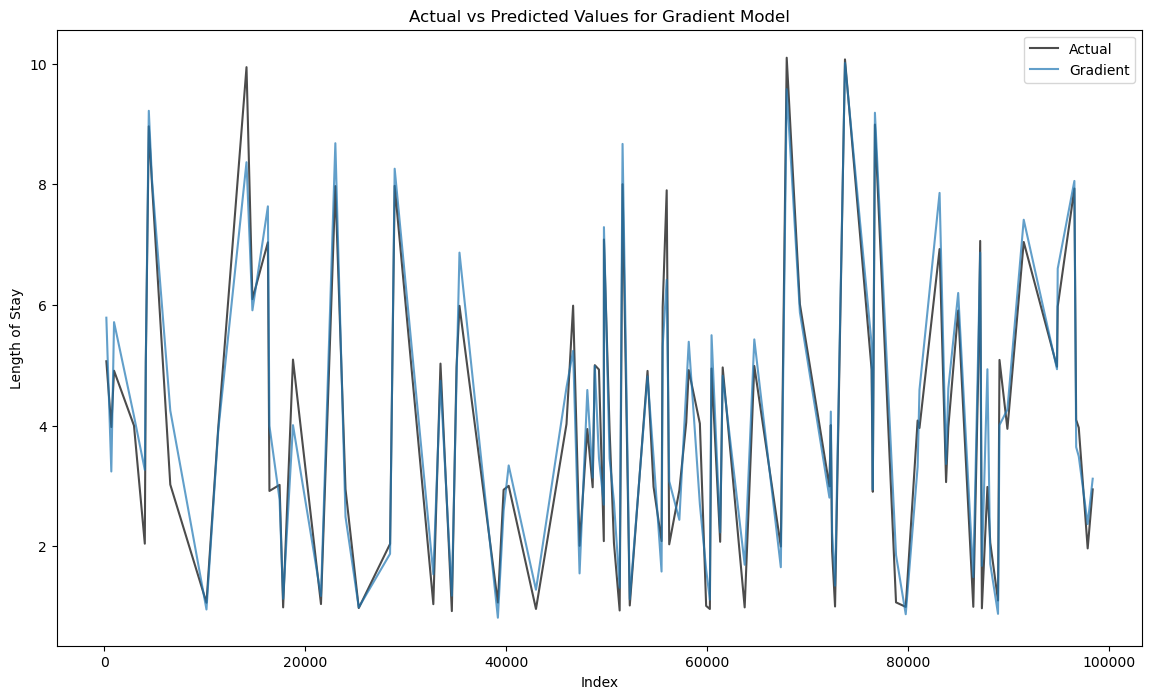

In [38]:
# Create a DataFrame with actual and predicted values
pred_results_df = pd.DataFrame({
    'Actual': y_test,
    'Gradient': y_pred_gbr
})

# Melt the DataFrame for easier plotting with seaborn
results_melted = pred_results_df.reset_index().melt(id_vars=['index', 'Actual'], var_name='Model', value_name='Prediction')

# Subsample the data (optional)
sample_size =  100 # Adjust as needed
results_melted_sampled = results_melted.sample(n=sample_size, random_state=42) 

# Add jitter to the data (optional)
jitter_width = 0.1  # Adjust as needed
results_melted_sampled['Actual_jitter'] = results_melted_sampled['Actual'] + np.random.uniform(-jitter_width, jitter_width, size=sample_size)
results_melted_sampled['Prediction_jitter'] = results_melted_sampled['Prediction'] + np.random.uniform(-jitter_width, jitter_width, size=sample_size)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_melted_sampled, x='index', y='Actual_jitter', label='Actual', color='black', alpha=0.7) 
sns.lineplot(data=results_melted_sampled, x='index', y='Prediction_jitter', hue='Model', palette='tab10', alpha=0.7) 
plt.title('Actual vs Predicted Values for Gradient Model')
plt.xlabel('Index')
plt.ylabel('Length of Stay')
plt.legend()
plt.show()

9. Compare Models (with Best Parameters)

In [29]:
# Define the models and their hyperparameter grids
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

param_grids = {
    'Linear Regression': {'fit_intercept': [True]},
    'Ridge Regression': {'alpha': [10.0]},
    'Lasso Regression': {'alpha': [0.1]},
    'Decision Tree Regression': {'max_depth': [10],'min_samples_split': [10]},
    'Gradient Boosting Regression': {'n_estimators': [200],'learning_rate': [0.2],'max_depth': [7]}
}

# Create a list to store model names and metrics
model_results = []

# Perform Grid Search with Cross-Validation
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    start_time = time()
    grid_search.fit(X_train, y_train)
    end_time = time()
    best_model = grid_search.best_estimator_

    # Evaluate the model on the testing set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    best_params = grid_search.best_params_
    model_results.append([model_name, end_time - start_time, mse, rmse, mae, r2])

# Create a DataFrame from the results
gscv_results_df = pd.DataFrame(model_results, columns=['Model', 'Train Time', 'MSE', 'RMSE', 'MAE', 'R-squared'])
print(gscv_results_df)

                          Model   Train Time       MSE      RMSE       MAE  \
0             Linear Regression     0.212024  1.289316  1.135480  0.870296   
1              Ridge Regression     0.109879  1.289305  1.135476  0.870289   
2              Lasso Regression     0.222920  1.390587  1.179232  0.908546   
3      Decision Tree Regression    10.207581  1.097354  1.047547  0.773665   
4  Gradient Boosting Regression  1902.913571  0.547383  0.739854  0.519480   

   R-squared  
0   0.765032  
1   0.765034  
2   0.746576  
3   0.800016  
4   0.900244  


9.1. Comparing Mean Squared Error of Models

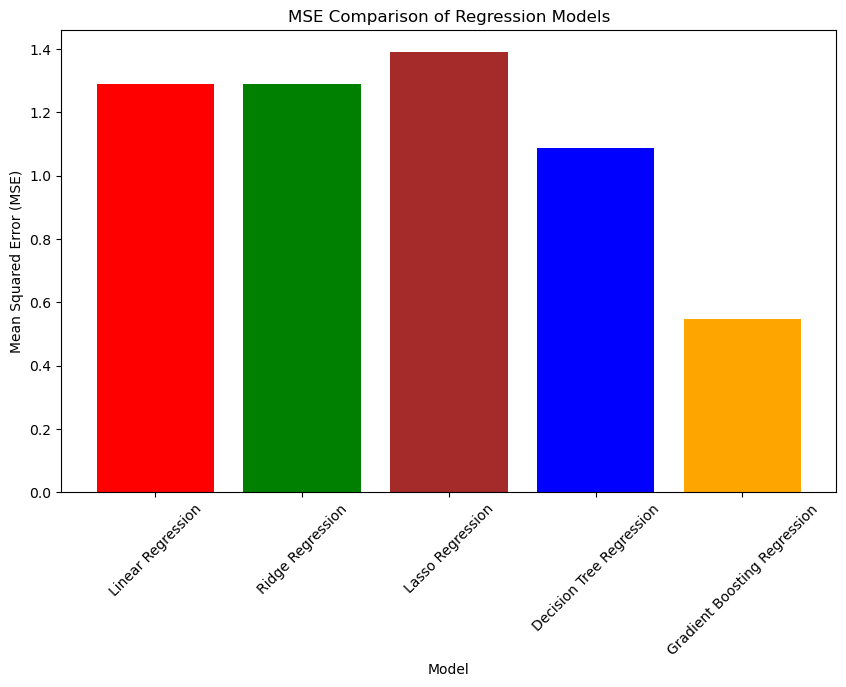

In [67]:
#Bar Plot on Comparing MSE's
colors = ['red','green','brown','blue','orange']
plt.figure(figsize=(10, 6))
plt.bar(gscv_results_df['Model'], gscv_results_df['MSE'], color=colors)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Regression Models')
plt.xticks(rotation=45)
plt.show()

Based on the MSE Comparision of models for the given dataset, Gradient Boosting performs better than the other models

9.2. Comparing Train Time of Models

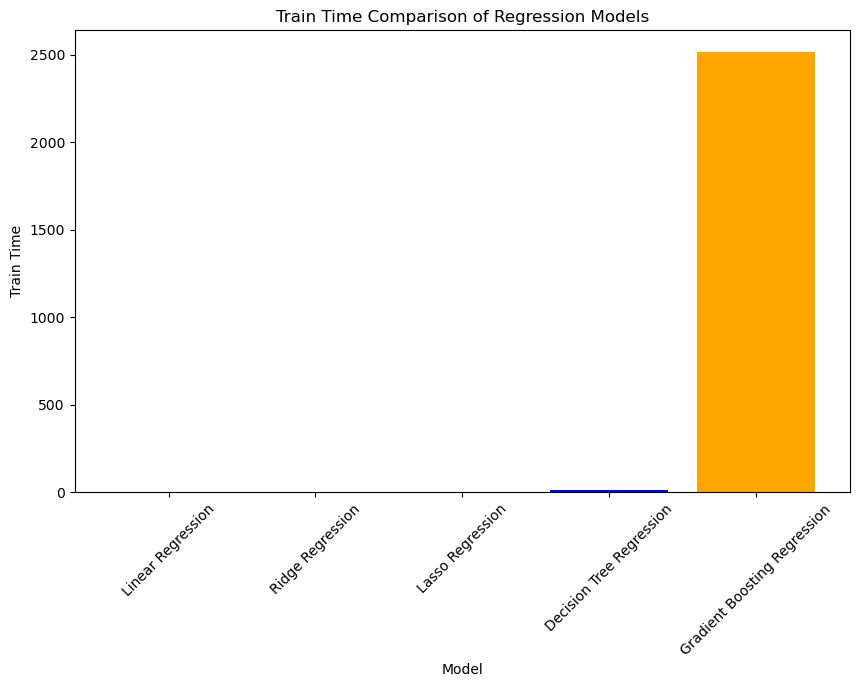

In [65]:
#Bar Plot on Comparing Train Time's
colors = ['red','green','brown','blue','orange']
plt.figure(figsize=(10, 6))
plt.bar(gscv_results_df['Model'], gscv_results_df['Train Time'], color=colors)
plt.xlabel('Model')
plt.ylabel('Train Time')
plt.title('Train Time Comparison of Regression Models')
plt.xticks(rotation=45)
plt.show()

Based on the Train Time Comparision of models for the given dataset, Gradient Boosting has taken more time

9.3. Comparing Mean Absolute Error of Models

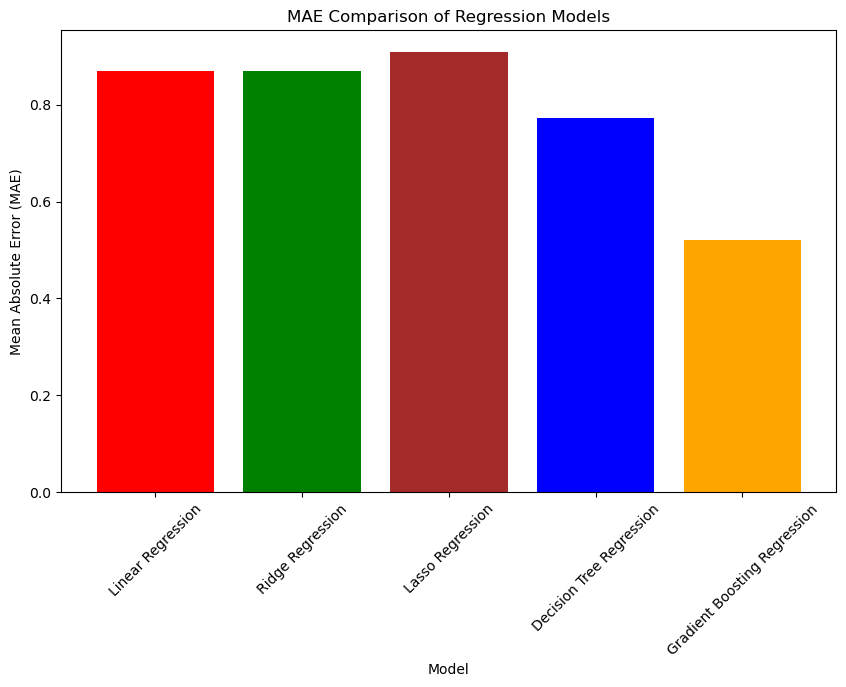

In [96]:
#Bar Plot on Comparing MAE's
colors = ['red','green','brown','blue','orange']
plt.figure(figsize=(10, 6))
plt.bar(gscv_results_df['Model'], gscv_results_df['MAE'], color=colors)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison of Regression Models')
plt.xticks(rotation=45)
plt.show()

Based on the MAE Comparision of models for the given dataset, Gradient Boosting Performs better than the other models

9.4. Comparing R-squared of Models

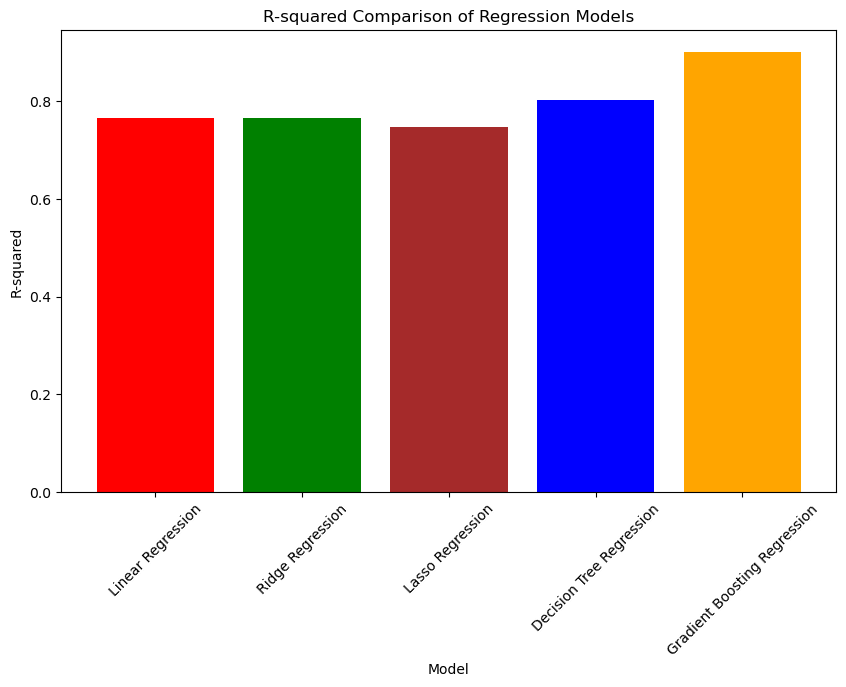

In [59]:
#Bar Plot on Comparing R-squared's
colors = ['red','green','brown','blue','orange']
plt.figure(figsize=(10, 6))
plt.bar(gscv_results_df['Model'], gscv_results_df['R-squared'], color=colors)
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Regression Models')
plt.xticks(rotation=45)
plt.show()

Based on the R-squared Comparision of models for the given dataset, Gradient Boosting Performs better than the other models. As higher R-squared value means that the model explains a larger proportion of the variability in the dependent variable. This suggests that the model is better at predicting the outcome. 

Next Steps : We can further analyze this dataset by eliminating certain variables and trying the modeling to see if they increase accuracy